In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['master.csv']


In [2]:
df = pd.read_csv('../input/master.csv')

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df.groupby('sex').agg({'population':'sum'})

,population
sex,
female,26272781857
male,25049376579


In [6]:
df.groupby('sex').agg({'suicides_no':'sum'})

,suicides_no
sex,
female,1559510
male,5188910


In [8]:
d = df.groupby(['sex','year']).agg({'suicides/100k pop':'mean'})

In [9]:
d = d.reset_index()

In [10]:
d.head()

,sex,year,suicides/100k pop
0,female,1985,5.776910
1,female,1986,5.812674
2,female,1987,5.732130
3,female,1988,6.323401
4,female,1989,6.176827


In [11]:
female = d.loc[d['sex']=='female',:]

In [12]:
female.head()

,sex,year,suicides/100k pop
0,female,1985,5.776910
1,female,1986,5.812674
2,female,1987,5.732130
3,female,1988,6.323401
4,female,1989,6.176827


In [13]:
male = d.loc[d['sex']=='male',:]

In [14]:
male.head()

,sex,year,suicides/100k pop
32,male,1985,17.875486
33,male,1986,17.033993
34,male,1987,17.556296
35,male,1988,19.095408
36,male,1989,19.581314


In [15]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Female Sucide rates/100k population')

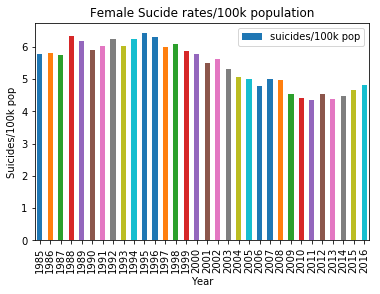

In [17]:
female.plot(x='year',y='suicides/100k pop',kind='bar')
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop')
plt.title('Female Sucide rates/100k population')

Text(0.5, 1.0, 'Male Sucide rates/100k population')

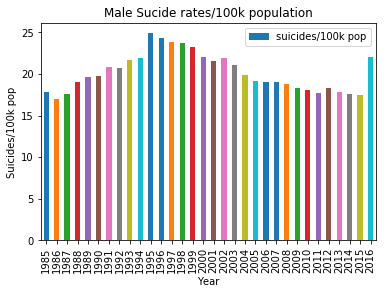

In [18]:
male.plot(x='year',y='suicides/100k pop',kind='bar')
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop')
plt.title('Male Sucide rates/100k population')

In [19]:
countrywise = df.groupby('country').agg({'suicides/100k pop':'mean'}).sort_values(by='suicides/100k pop')

In [20]:
countrywise.head()

,suicides/100k pop
country,
Saint Kitts and Nevis,0.000000
Dominica,0.000000
Jamaica,0.521765
Antigua and Barbuda,0.552901
Oman,0.736111


In [21]:
countrywise = countrywise.reset_index()

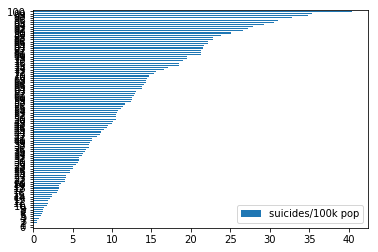

In [22]:
countrywise.plot(kind='barh')

In [23]:
#Case study of south africa

sa = df[df['country']=='South Africa'].groupby('year').agg({'suicides_no':'sum','population':'mean'})

In [24]:
sa = sa.reset_index()

In [25]:
sa.head()

,year,suicides_no,population
0,1996,143,3.147804e+06
1,1997,104,3.210680e+06
2,1998,180,3.269372e+06
3,1999,279,3.325630e+06
4,2000,267,3.380713e+06


In [26]:
sa = sa.astype(int)

In [27]:
sa.head()

,year,suicides_no,population
0,1996,143,3147804
1,1997,104,3210679
2,1998,180,3269372
3,1999,279,3325630
4,2000,267,3380713


In [28]:
year1 = sa.iloc[:,0].values

In [29]:
pop1 = sa.iloc[:,2].values

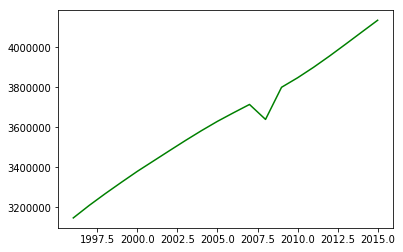

In [30]:
plt.plot(year1,pop1,color='green')

Populaion increase vs year in South Africa

In [31]:
suicide_no1 = sa.iloc[:,1].values

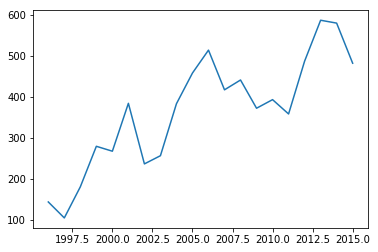

In [32]:
plt.plot(year1,suicide_no1)

Text(0.5, 1.0, 'Population vs Sucide number in South Africa')

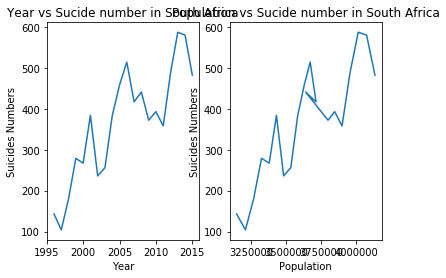

In [33]:
plt.subplot(1,2,1)
plt.plot(year1,suicide_no1)
plt.xlabel('Year')
plt.ylabel('Suicides Numbers')
plt.title('Year vs Sucide number in South Africa')

plt.subplot(1,2,2)
plt.plot(pop1,suicide_no1)
plt.xlabel('Population')
plt.ylabel('Suicides Numbers')
plt.title('Population vs Sucide number in South Africa')

Thus we can see that as year increase, there is similar increase in population, due to which there are a similar pattern in increase in suicide rates.

In [34]:
globaldata = df.groupby('year').agg({'suicides_no':'sum'})

In [35]:
globaldata.head()

,suicides_no
year,
1985,116063
1986,120670
1987,126842
1988,121026
1989,160244


In [36]:
globaldata = globaldata.reset_index()

Text(0, 0.5, 'Suicides')

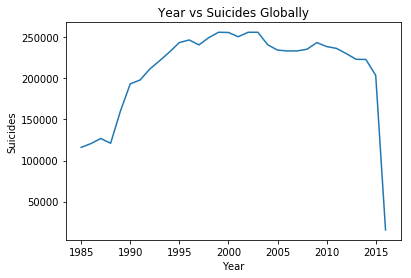

In [38]:
plt.plot(globaldata.year,globaldata.suicides_no)
plt.title('Year vs Suicides Globally')
plt.xlabel('Year')
plt.ylabel('Suicides')

Thus, there is a rapid decrease in suicide rate during 2013-2015 .